엔트로피, 상호정보량 20191116_01 ~ 03, 데이터 분석, 머신러닝용 파이썬 패키지 20191116_01 ~ 02

<img src="resources/entropy.png">


In [11]:
-0.5 * np.log2(0.5) - 0.5 * np.log2(0.5)

1.0

In [12]:
-0.8 * np.log2(0.8) - 0.2 * np.log2(0.2)

0.7219280948873623

In [13]:
eps = np.finfo(float).eps
-1 * np.log2(1) - eps * np.log2(eps)

1.1546319456101628e-14

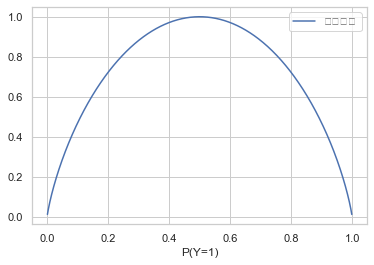

In [19]:
P0 = np.linspace(0.001, 1 - 0.001, 1000) 
P1 = 1 - P0
H = - P0 * np.log2(P0) - P1 * np.log2(P1)
plt.plot(P1, H, "-", label="엔트로피") 
plt.legend()
plt.xlabel("P(Y=1)")
plt.show()
%matplotlib inline

In [20]:
N = 200
p = [1/2, 1/4, 1/8, 1/8]
doc0 = list("".join([int(N * p[i]) * c for i, c in enumerate("ABCD")]))
np.random.shuffle(doc0)
doc = "".join(doc0)
doc

'CAAAAAADABAAABAAAAAABACBDDBABAAAABCADBBBAACCADDACBBDBBCAAADAACAADBAABCADACCBBBBAADDABACCACAABBDBAAAAABBACAAAAACCBCBABAAADDACABAABCABAAAAAACCABBABBABADDADDBBAADAAACAAADBDDAAAADCBBAABAABABBAABBAAAADBABC'

In [21]:
encoder = {"A": "00", "B": "01", "C": "10", "D": "11"}
encoded_doc = "".join([encoder[c] for c in doc])
encoded_doc

'1000000000000011000100000001000000000000010010011111010001000000000110001101010100001010001111001001011101011000000011000010000011010000011000110010100101010100001111000100101000100000010111010000000000010100100000000000101001100100010000001111001000010000011000010000000000001010000101000101000100111100111101010000110000001000000011011111000000001110010100000100000100010100000101000000001101000110'

In [22]:
len(encoded_doc)

400

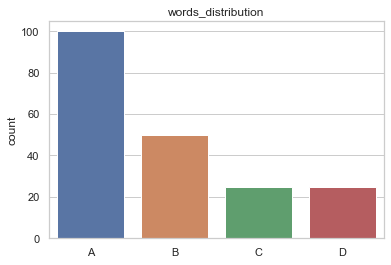

In [23]:
sns.countplot(list(doc), order="ABCD")
plt.title("words_distribution")
plt.show()

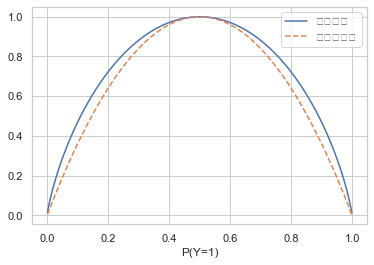

In [24]:
P0 = np.linspace(0.001, 1 - 0.001, 1000)
P1 = 1 - P0
H = - P0 * np.log2(P0) - P1 * np.log2(P1)
G = 2 * (P0 * (1 - P0) + P1 * (1 - P1))

plt.plot(P1, H, "-", label="엔트로피")
plt.plot(P1, G, "--", label="지니불순도")
plt.legend()
plt.xlabel("P(Y=1)")
plt.show()

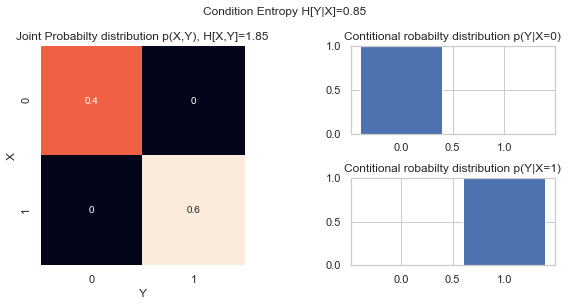

In [26]:
plt.figure(figsize=(8, 4))
ax1 = plt.subplot(121)
pXY = [[0.4, 0], [0, 0.6]]
sns.heatmap(pXY, annot=True, cbar=False)
plt.xlabel("Y")
plt.ylabel("X")
plt.title("Joint Probabilty distribution p(X,Y), H[X,Y]=1.85")

plt.subplot(222)
plt.bar([0, 1], [1, 0])
plt.ylim(0, 1)
plt.title("Contitional robabilty distribution p(Y|X=0)")

plt.subplot(224)
plt.bar([0, 1], [0, 1])
plt.ylim(0, 1)
plt.title("Contitional robabilty distribution p(Y|X=1)")

plt.tight_layout(w_pad=5)
plt.suptitle("Condition Entropy H[Y|X]=0.85", y=1.05)
plt.show()


In [27]:
from sklearn.datasets import load_iris

iris = load_iris()
idx = np.in1d(iris.target, [0, 1])
X = iris.data[idx, :]
y = iris.target[idx]
df = pd.DataFrame(X, columns=iris.feature_names)
df["y"] = iris.target[idx]
df["y_hat"] = (df["sepal length (cm)"] > 5.4).astype(int)
df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),y,y_hat
95,5.7,3.0,4.2,1.2,1,1
96,5.7,2.9,4.2,1.3,1,1
97,6.2,2.9,4.3,1.3,1,1
98,5.1,2.5,3.0,1.1,1,0
99,5.7,2.8,4.1,1.3,1,1
